# Aprendendo a fazer uma rede neural
### *(Usando: Pytorch, SKLearn, Polars e Matplotlib)*

Começameremos importando o polars e lendo o arquivo csv que contém os dados.

In [20]:
#Importando a biblioteca pandas
import polars as pl

#Tornando o arquivo csv em um dataframe do polars
df = pl.read_csv("cancer.csv")

In [21]:
#Mostra o dataframe
df

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""M""",69,1,2,2,1,1,2,1,2,2,2,2,2,2,"""YES"""
"""M""",74,2,null,1,1,2,2,2,1,1,1,2,2,2,"""YES"""
"""F""",59,1,1,1,2,1,2,1,2,1,2,2,1,2,"""NO"""
"""M""",63,2,2,2,1,1,1,1,1,2,1,1,2,2,"""NO"""
"""F""",63,1,2,1,1,1,1,1,2,1,2,2,1,1,"""NO"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""F""",56,1,1,1,2,2,2,1,1,2,2,2,2,1,"""YES"""
"""M""",70,2,1,1,1,1,2,2,2,2,2,2,1,2,"""YES"""
"""M""",58,2,1,1,1,1,1,2,2,2,2,1,1,2,"""YES"""


### Começaremos a tratar os dados do Data Frame

- Primeiro transformando os dados categóricos em numéricos
- Depois ajustando os dados para que fiquem na mesma escala
- Removeremos as colunas que não serão usadas e os valores faltantes serão preenchidos com a média dos valores da coluna
- Por fim, vamos normalizar a coluna AGE para que fiquem na mesma escala

In [22]:
#Fazendo um breve tratamento de dados para transformar os dados categóricos em numéricos

#Criando um array de colunas
columns = [ 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

#Mudando M e F para 0 e 1
df = df.with_columns(
    pl.when(pl.col("GENDER") == "M").then(0)
        .when(pl.col("GENDER") == "F").then(1)
        .otherwise(pl.col("GENDER"))
        .alias("GENDER"))

#Mudando 2 e 1 para 0 e 1 (para maior organização do código)
for coluna in columns:
    df = df.with_columns(
        pl.when(pl.col(coluna) == 2).then(1)
        .when(pl.col(coluna) == 1).then(0)
        .otherwise(pl.col(coluna))
        .alias(coluna))

#Mudando YES e NO para 1 e 0
df = df.with_columns(
    pl.when(pl.col("LUNG_CANCER") == "YES").then(1)
        .when(pl.col("LUNG_CANCER") == "NO").then(0)
        .otherwise(pl.col("LUNG_CANCER"))
        .alias("LUNG_CANCER"))

df #Mostra o DataFrame após a transformação

#Podemos passar tudo para um novo_dataframe.csv usando a função write_csv(novo_dataframe.csv) do polars


GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""0""",69,0,1,1,0,0,1,0,1,1,1,1,1,1,"""1"""
"""0""",74,1,null,0,0,1,1,1,0,0,0,1,1,1,"""1"""
"""1""",59,0,0,0,1,0,1,0,1,0,1,1,0,1,"""0"""
"""0""",63,1,1,1,0,0,0,0,0,1,0,0,1,1,"""0"""
"""1""",63,0,1,0,0,0,0,0,1,0,1,1,0,0,"""0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1""",56,0,0,0,1,1,1,0,0,1,1,1,1,0,"""1"""
"""0""",70,1,0,0,0,0,1,1,1,1,1,1,0,1,"""1"""
"""0""",58,1,0,0,0,0,0,1,1,1,1,0,0,1,"""1"""


shape: (4, 3)
┌────────┬─────────────┬───────┐
│ GENDER ┆ LUNG_CANCER ┆ count │
│ ---    ┆ ---         ┆ ---   │
│ str    ┆ str         ┆ u32   │
╞════════╪═════════════╪═══════╡
│ 0      ┆ 0           ┆ 17    │
│ 0      ┆ 1           ┆ 145   │
│ 1      ┆ 1           ┆ 125   │
│ 1      ┆ 0           ┆ 22    │
└────────┴─────────────┴───────┘


C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\3719346147.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\3719346147.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


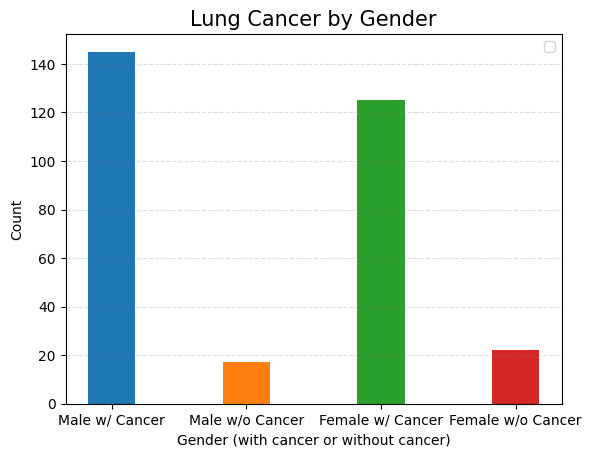

In [23]:
#Agora vamos fazer um gráfico de barras para ver a relação entre o sexo e a doença
import matplotlib.pyplot as plt #importando a biblioteca matplotlib para visualizar os dados
import numpy as np #importando o numpy como np

#Agregando os dados por sexo e doença usando a função groupby() e a função agg()
ag_data = df.group_by(["GENDER", "LUNG_CANCER"]).agg([
    pl.len().alias("count")])

print(ag_data)
#print(ag_data.columns)

#Extraindo os dados de ag_data
gender = ag_data['GENDER'].to_list()
disease = ag_data["LUNG_CANCER"].to_list()
count = ag_data["count"].to_list()

#Configurar posição do gráfico
bar_width = 0.35
index = np.arange(4)

#Dividindo os dados por categoria (sempre bom checar como os dados foram salvos)
MWC = [count[i] for i in range(len(gender)) if gender[i] == "0" and disease[i] == "1"]
MOC = [count[i] for i in range(len(gender)) if gender[i] == "0" and disease[i] == "0"]
FWC = [count[i] for i in range(len(gender)) if gender[i] == "1" and disease[i] == "1"]
FOC = [count[i] for i in range(len(gender)) if gender[i] == "1" and disease[i] == "0"]

# Verificar se as listas estão corretas (Ficará comentado para não poluir a visualização)
#print("gender:", gender)
#print("disease:", disease)
#print("count:", count)
#print("MWC:", MWC)
#print("MOC:", MOC)
#print("FWC:", FWC)
#print("FOC:", FOC)

#Cria a figura e os eixos
fig, ax = plt.subplots()

# Criando as barras (As labels começam com _ para serem ignoradas ao chmar a função ax.legend())
bars1 = ax.bar(index[0], MWC, bar_width, label="_Male with Cancer")
bars2 = ax.bar(index[1], MOC, bar_width, label="_Male without Cancer")
bars3 = ax.bar(index[2], FWC, bar_width, label="_Female with Cancer")
bars4 = ax.bar(index[3], FOC, bar_width, label="_Female without Cancer")

ax.legend()

# Adicionar grades
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

#Configurando o gráfico
ax.set_xlabel("Gender (with cancer or without cancer)", fontsize = 10)
ax.set_ylabel("Count", fontsize = 10)
ax.set_title("Lung Cancer by Gender", fontsize = 15)

ax.set_xticks(index)
ax.set_xticklabels(["Male w/ Cancer", "Male w/o Cancer", "Female w/ Cancer", "Female w/o Cancer"])
ax.legend()

plt.show() #Mostra o gráfico


(Esse gráfico mostra a relação entre o sexo e a doença)

C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\2904879136.py:5: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  age_counts = df_positive.groupby('AGE').agg(pl.count('LUNG_CANCER').alias('count')).sort('AGE')


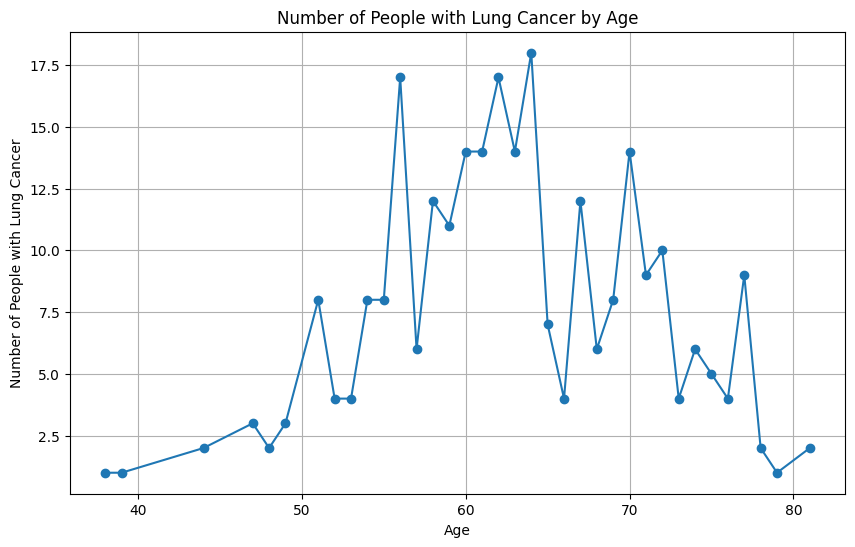

In [24]:

# Filtrar apenas os casos positivos de câncer
df_positive = df.filter(pl.col('LUNG_CANCER') == "1")

# Contar a quantidade de pessoas com câncer por idade e ordenar os dados
age_counts = df_positive.groupby('AGE').agg(pl.count('LUNG_CANCER').alias('count')).sort('AGE')

# Extrair as idades e as contagens para plotagem
ages = age_counts['AGE'].to_list()
counts = age_counts['count'].to_list()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ages, counts, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Number of People with Lung Cancer')
plt.title('Number of People with Lung Cancer by Age')
plt.grid(True)
plt.show()

In [25]:
#Agora vamos contar a quantidade de nulos em cada coluna para ver se há dados faltantes

df.null_count() #Mostra a quantidade de nulos em cada coluna

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#Existem 6 valores faltantes na coluna "YELLOW_FINGERS", vamos decidir como trata-los
    #Podemos apagar a coluna, apagar as linhas com os valores faltantes, ou substituir os valores faltantes
    #Como sao poucos dados faltantes, poderíamos apagar as linhas com os valores faltantes,
        #mas vamos substituir os valores faltantes
    #Podemos substituir os valores faltantes pela média, pela mediana, ou pela moda
    #Vamos substituir os valores faltantes pela moda

freq = df.group_by(df["YELLOW_FINGERS"]).agg([
    pl.len().alias("count")])

#Colocando os dados em uma lista decrscente em relação com a frequência para facilitar a substituição
freq = freq.sort("count", descending = True)

freq #Mostra a frequência de cada valor na coluna "YELLOW_FINGERS"

mode = freq["YELLOW_FINGERS"][0]

print("A moda é: ", mode) #Mostra a moda

#Visto a moda, camos substituir os valores faltantes pela mesma usando a função with_columns() do polars
df = df.with_columns(
    pl.when(pl.col("YELLOW_FINGERS").is_null()).then(mode)
    .otherwise(pl.col("YELLOW_FINGERS"))
    .alias("YELLOW_FINGERS"))

df.null_count() #Mostra a quantidade de nulos em cada coluna para checar se a substituição foi 
                #bem sucedida (Saída esperada: 0 nulos em cada coluna)

A moda é:  1


GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Como estamos usando o polars, teremos que fazer essa normalização a mão

1. Calcularemos o valor *mínimo* e *máximo* da coluna "AGE"
2. A partir desses valores utilizaremos o seguinte algoritmo para normalizar a coluna "AGE":

$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

onde:
- \( x \) é o valor original.
- \( x_{\text{min}} \) é o valor mínimo do conjunto de dados.
- \( x_{\text{max}} \) é o valor máximo do conjunto de dados.

3. O resultado da normalização será um valor entre *0* e *1*

Obs.: O valor mínimo da coluna "AGE" será 0 e o valor máximo da coluna "AGE" será 1

In [27]:
#Feito! Agora vamos normalizar a coluna AGE
    #Para isso vamos começar com os valores mínimos e máximos da coluna "AGE"

# Calcular o valor mínimo e máximo da coluna "AGE"
min_age = df.select(pl.col("AGE").min()).to_numpy()[0]
max_age = df.select(pl.col("AGE").max()).to_numpy()[0]

print(f"O valor mínimo da idade é: {min_age}\nO valor máximo da idade é: {max_age}")

#Vamos normalizar a coluna AGE usando a função with_columns() do polars
df = df.with_columns(
    ((pl.col("AGE") - min_age) / (max_age - min_age)).alias("AGE_normalized")
)

new_min_age = df.select(pl.col("AGE").min()).to_numpy()[0]
new_max_age = df.select(pl.col("AGE").max()).to_numpy()[0]

print(f"O novo valor mínimo da idade é: {new_min_age}\nO valor máximo da idade é: {new_max_age}") 
#Valores esperados: 0.0 e 1.0

df #Mostra o DataFrame após a normalização da coluna AGE

O valor mínimo da idade é: [21]
O valor máximo da idade é: [87]
O novo valor mínimo da idade é: [21]
O valor máximo da idade é: [87]


GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_normalized
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64
"""0""",69,0,1,1,0,0,1,0,1,1,1,1,1,1,"""1""",0.727273
"""0""",74,1,1,0,0,1,1,1,0,0,0,1,1,1,"""1""",0.80303
"""1""",59,0,0,0,1,0,1,0,1,0,1,1,0,1,"""0""",0.575758
"""0""",63,1,1,1,0,0,0,0,0,1,0,0,1,1,"""0""",0.636364
"""1""",63,0,1,0,0,0,0,0,1,0,1,1,0,0,"""0""",0.636364
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1""",56,0,0,0,1,1,1,0,0,1,1,1,1,0,"""1""",0.530303
"""0""",70,1,0,0,0,0,1,1,1,1,1,1,0,1,"""1""",0.742424
"""0""",58,1,0,0,0,0,0,1,1,1,1,0,0,1,"""1""",0.560606


Distribuição inicial das classes:
shape: (2, 2)
┌─────────────┬───────┐
│ LUNG_CANCER ┆ count │
│ ---         ┆ ---   │
│ i32         ┆ u32   │
╞═════════════╪═══════╡
│ 1           ┆ 270   │
│ 0           ┆ 39    │
└─────────────┴───────┘
Distribuição após SMOTE:
shape: (2, 2)
┌─────────────┬───────┐
│ LUNG_CANCER ┆ count │
│ ---         ┆ ---   │
│ f64         ┆ u32   │
╞═════════════╪═══════╡
│ 1.0         ┆ 270   │
│ 0.0         ┆ 270   │
└─────────────┴───────┘


C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\3665338918.py:12: DeprecationWarning: named `columns` param is deprecated; use positional `*args` instead.
  features = df.drop(columns=['LUNG_CANCER']).to_numpy()
C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\3665338918.py:20: DeprecationWarning: named `columns` param is deprecated; use positional `*args` instead.
  columns = df.drop(columns=['LUNG_CANCER']).columns
C:\Users\lucas\AppData\Local\Temp\ipykernel_32392\3665338918.py:34: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  age_counts = df_positive.groupby('AGE').agg(pl.count('LUNG_CANCER').alias('count')).sort('AGE')


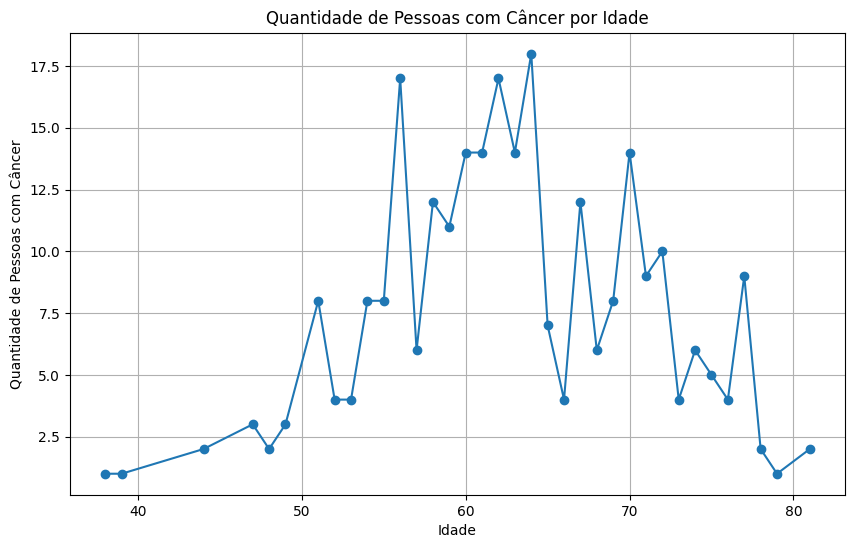

In [28]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Converter a coluna LUNG_CANCER para tipo numérico
df = df.with_columns(pl.col('LUNG_CANCER').cast(pl.Int32))

# Verificar a distribuição inicial das classes
print("Distribuição inicial das classes:")
print(df['LUNG_CANCER'].value_counts())

# Extrair características (features) e rótulos (labels)
features = df.drop(columns=['LUNG_CANCER']).to_numpy()
target = df['LUNG_CANCER'].to_numpy()

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target)

# Criar um novo DataFrame com os dados balanceados
columns = df.drop(columns=['LUNG_CANCER']).columns
df_resampled = pl.DataFrame(
    np.hstack((x_resampled, y_resampled.reshape(-1, 1))),
    schema=[*columns, 'LUNG_CANCER']
)

# Verificar a distribuição das classes após SMOTE
print("Distribuição após SMOTE:")
print(df_resampled['LUNG_CANCER'].value_counts())

# Continuar a análise com o DataFrame balanceado
df_positive = df_resampled.filter(pl.col('LUNG_CANCER') == 1)

# Contar a quantidade de pessoas com câncer por idade e ordenar os dados
age_counts = df_positive.groupby('AGE').agg(pl.count('LUNG_CANCER').alias('count')).sort('AGE')

# Extrair as idades e as contagens para plotagem
ages = age_counts['AGE'].to_list()
counts = age_counts['count'].to_list()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ages, counts, marker='o', linestyle='-')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas com Câncer')
plt.title('Quantidade de Pessoas com Câncer por Idade')
plt.grid(True)
plt.show()

df_resampled.write_csv("df_resampled.csv", separator=",")

In [29]:
#Agroa vamos separar os dados em treino e teste
    #Vamos primeiro definir a coluna target como a LUNG_CANCER
    #As demais colunas serão as features usadas para treinar o modelo
    #Vamos separar os dados em 80% para treino e 20% para teste
    #Obs.: A divisão deve ser feita de forma aleatória para evitar que o modelo fique enviesado

#Importando a função train_test_split do sklearn   
from sklearn.model_selection import train_test_split as tsplit

#x_train, x_test, y_train, y_test = tsplit(features, target, test_size = 0.2, random_state = 42)
x_train, x_test, y_train, y_test = tsplit(x_resampled, y_resampled, test_size=0.2, random_state=None, shuffle=True)

#Mostra os tamanhos dos dados de treino e teste
print(f"Tamnaho do x_train: {x_train.shape} \nTamanho do x_test: {x_test.shape} \nTamanho do y_train: {y_train.shape}\nTamanho do y_test: {y_test.shape}") 


Tamnaho do x_train: (432, 16) 
Tamanho do x_test: (108, 16) 
Tamanho do y_train: (432,)
Tamanho do y_test: (108,)


## Agora iremos construir a rede neural

1. Definiremos a estrutura da rede neural
    - Definiremos as camadas da rede neural
        - Aqui foi definido que teremos 15 features como input na primeira camada e 1 saída na última camada
        - Entre elas terão duas hidden layers com 64 e 32 neurônios respectivamente
    - Definiremos a função de ativação
        - A função de ativação das primeiras camadas será a função ReLU
        - A função de ativação da camada de saída será a função sigmoid
    

In [30]:
import torch #Importando a biblioteca de tensores
import torch.nn as nn #Importando a biblioteca de redes neurais
import torch.optim as optim #Importando a biblioteca de otimizadores

#Definindo a estrutura da rede neural

class LungCancer(nn.Module):
    def __init__(self, input_dim):
        super(LungCancer, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64) #Input layer
        self.fc2 = nn.Linear(64, 32) #Hidden layer
        self.fc3 = nn.Linear(32, 16) #Hidden layer
        self.fc4 = nn.Linear(16, 1) #Output layer
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x



### Funções de Ativação

- **ReLU (Rectified Linear Unit)**:
  - Introduz não-linearidade na rede, permitindo que a rede aprenda padrões complexos.
  - Fórmula: 
$$
\text{ReLU}(x) = \max(0, x)
$$

- **Sigmoid**:
  - Transforma a saída em uma probabilidade entre 0 e 1.
  - Fórmula: 
$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

### Resumo

- **Camada de Entrada**: 15 neurônios (correspondendo às 15 features de entrada).
- **Primeira Camada Oculta**: 64 neurônios, ReLU.
- **Segunda Camada Oculta**: 32 neurônios, ReLU.
- **Camada de Saída**: 1 neurônio, Sigmoid.

# Função de Perda

- BCELoss:

$$
\text{BCELoss} = -\frac{1}{N} \sum_{i=1}^N [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

In [31]:
# Certifique-se de que a dimensão de entrada corresponda ao número de características em X_train
input_dim = x_train.shape[1]
model = LungCancer(input_dim)

# Definir a função de perda
criterion = nn.BCELoss()  # Binary Cross Entropy Loss para classificação binária

# Definir o otimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
import torch # Importando a biblioteca de tensores

# Certificar que os dados são do tipo float32
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Convertendo dados de treinamento para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Convertendo dados de teste para tensores
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Verificar as dimensões para garantir que estão corretas
print(f'X_train_tensor shape: {X_train_tensor.shape}')
print(f'y_train_tensor shape: {y_train_tensor.shape}')
print(f'X_test_tensor shape: {X_test_tensor.shape}')
print(f'y_test_tensor shape: {y_test_tensor.shape}')


X_train_tensor shape: torch.Size([432, 16])
y_train_tensor shape: torch.Size([432, 1])
X_test_tensor shape: torch.Size([108, 16])
y_test_tensor shape: torch.Size([108, 1])


In [33]:
# Definir o número de épocas
num_epochs = 1000

# Lista para armazenar as perdas
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/1000], Loss: 0.6832
Epoch [20/1000], Loss: 0.6783
Epoch [30/1000], Loss: 0.6710
Epoch [40/1000], Loss: 0.6593
Epoch [50/1000], Loss: 0.6391
Epoch [60/1000], Loss: 0.6040
Epoch [70/1000], Loss: 0.5457
Epoch [80/1000], Loss: 0.4634
Epoch [90/1000], Loss: 0.3771
Epoch [100/1000], Loss: 0.3115
Epoch [110/1000], Loss: 0.2699
Epoch [120/1000], Loss: 0.2454
Epoch [130/1000], Loss: 0.2298
Epoch [140/1000], Loss: 0.2190
Epoch [150/1000], Loss: 0.2113
Epoch [160/1000], Loss: 0.2055
Epoch [170/1000], Loss: 0.2013
Epoch [180/1000], Loss: 0.1978
Epoch [190/1000], Loss: 0.1945
Epoch [200/1000], Loss: 0.1916
Epoch [210/1000], Loss: 0.1887
Epoch [220/1000], Loss: 0.1860
Epoch [230/1000], Loss: 0.1838
Epoch [240/1000], Loss: 0.1814
Epoch [250/1000], Loss: 0.1791
Epoch [260/1000], Loss: 0.1770
Epoch [270/1000], Loss: 0.1752
Epoch [280/1000], Loss: 0.1731
Epoch [290/1000], Loss: 0.1740
Epoch [300/1000], Loss: 0.1696
Epoch [310/1000], Loss: 0.1678
Epoch [320/1000], Loss: 0.1659
Epoch [330/1000],

In [34]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()
    accuracy = (predictions == y_test_tensor).sum() / y_test_tensor.shape[0]
    print(f'Accuracy: {accuracy.item():.4f}')

Accuracy: 0.9537


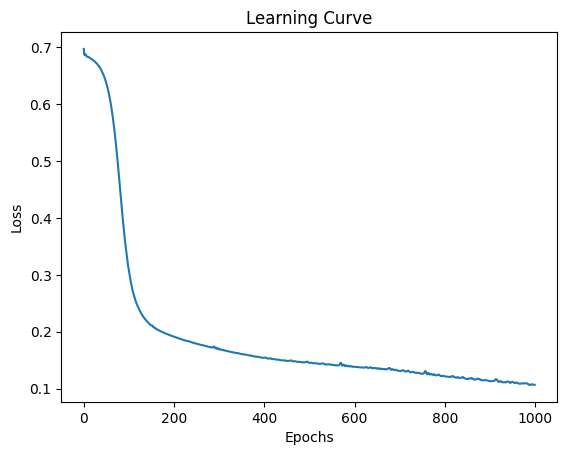

In [35]:
import matplotlib.pyplot as plt

# Plotar a curva de aprendizado
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()


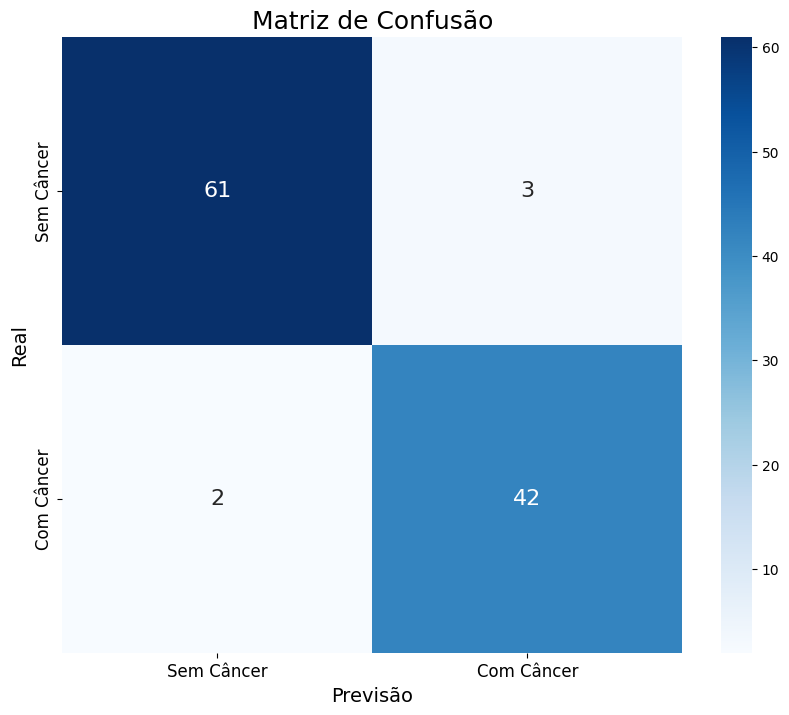

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliar o modelo e obter as previsões
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions.numpy())

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, annot_kws={"size": 16})
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title('Matriz de Confusão', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['Sem Câncer', 'Com Câncer'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Sem Câncer', 'Com Câncer'], fontsize=12)
plt.show()


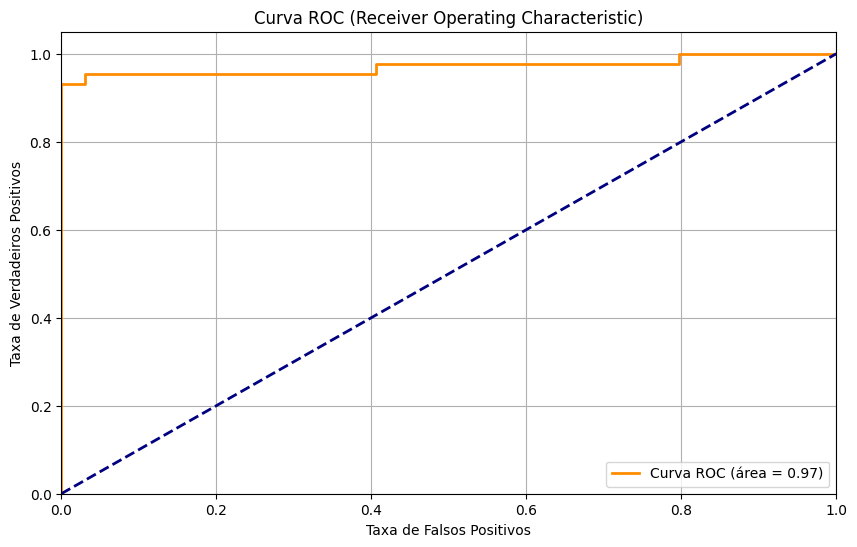

In [37]:
from sklearn.metrics import roc_curve, auc

model.eval()
with torch.no_grad():
    probabilities = model(X_test_tensor).numpy()

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


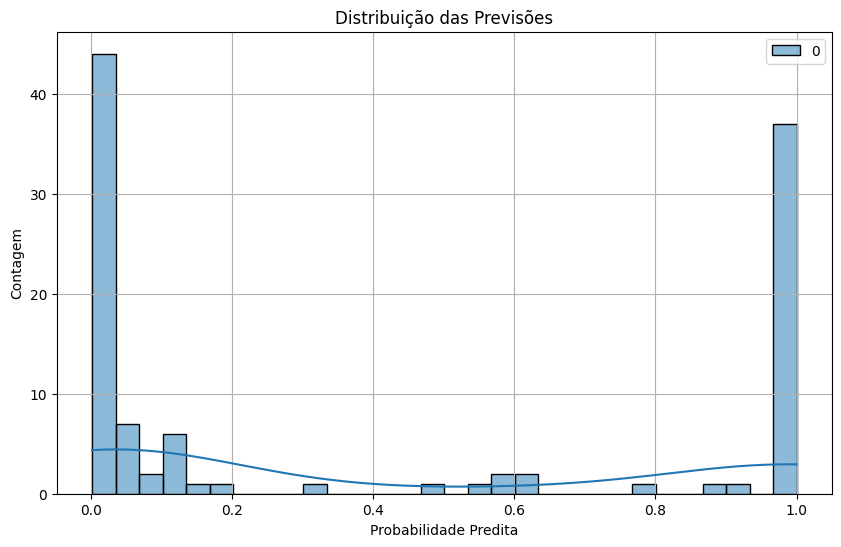

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(probabilities, kde=True, bins=30, color='blue')
plt.xlabel('Probabilidade Predita')
plt.ylabel('Contagem')
plt.title('Distribuição das Previsões')
plt.grid(True)
plt.show()
